In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [13]:
def read_analyzed_edge(full_path):
    temp_df = pd.read_csv(full_path)
    temp_df['period_score'] = (1 < temp_df['period']) | (temp_df['period'] < 4)
    temp_df['maxcov_score'] = temp_df['maxcov'] < .2
    temp_df['amp_score'] = (4 < temp_df['amp']) |(temp_df['amp'] < 20)
    temp_df['sum_score'] = temp_df.loc[:,['period_score','maxcov_score','amp_score']].astype(int).sum(axis=1)
    temp_df['total_score'] = temp_df['sum_score'].sum()
    return temp_df

In [14]:
DATA_DIR = 'analyzed_edges/'
files = [file for file in os.listdir(DATA_DIR) if file.startswith('edge_analysis') and file.endswith('.csv')]
df_dict = dict()
for file in files[:10]:
    full_path = os.path.join(DATA_DIR, file)
    date = file.replace('.csv','')
    temp_df = read_analyzed_edge(full_path)
    display(temp_df)
    for col in temp_df:
        temp_df[col] = temp_df[col].apply(lambda x : x if np.isfinite(x) else temp_df[col].max())
    df_dict[date] = temp_df
    assert temp_df.notnull().all().all(), 'Nan still found'

,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-95207.979270,0.000252,1.554514,95203.311709,2.639480e+16,415.899194,40.413132,43.0,1.624648e+08,0.214865,True,False,True,2,96
1,-67.505780,0.010860,0.874646,63.224100,2.689060e+03,9.642533,43.068691,50.0,4.992712e+01,0.005606,True,False,True,2,96
2,-106.147829,0.008664,1.053691,103.003644,1.632427e+04,12.086728,45.982391,60.0,1.258295e+02,0.006420,True,False,True,2,96
3,-95.914066,0.009465,1.060498,93.247441,6.070130e+03,11.064345,48.364666,70.0,7.616453e+01,0.005100,True,False,True,2,96
4,-50.731682,0.015710,0.739674,46.953087,5.581782e+01,6.665727,49.490242,78.0,6.221161e+00,0.002522,True,False,True,2,96
5,-45.782677,0.018544,0.653659,41.470236,1.163816e+01,5.647199,50.093727,86.0,3.205112e+00,0.001875,True,False,True,2,96
6,-45.441235,0.019341,0.712040,42.206060,9.183941e+00,5.414439,50.300240,96.0,3.030502e+00,0.001690,True,False,True,2,96
7,-45.140370,0.019884,0.802185,43.312826,9.165407e+00,5.266455,50.163723,106.0,3.027442e+00,0.001600,True,False,True,2,96
8,-44.620437,0.020206,0.915592,44.713612,9.448595e+00,5.182717,49.754833,116.0,3.073857e+00,0.001597,True,False,True,2,96
9,-44.016844,0.019906,1.100860,46.027454,9.925427e+00,5.260739,49.133480,126.0,3.150465e+00,0.001726,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-62.751339,0.017666,0.410184,50.066963,3.022016e+01,5.927736,53.548492,74.0,4.452733e+00,0.001552,True,False,True,2,96
1,-59.560361,0.020010,0.335291,45.981611,8.925562e+00,5.233267,54.291447,84.0,2.854732e+00,0.001147,True,False,True,2,96
2,-59.165524,0.021829,0.306308,45.317009,7.606364e+00,4.797184,54.522377,94.0,2.757964e+00,0.000925,True,False,True,2,96
3,-59.827218,0.021820,0.441964,48.128198,7.487102e+00,4.799263,55.134708,104.0,2.736257e+00,0.000890,True,False,True,2,96
4,-59.837744,0.022583,0.515913,49.985260,7.761386e+00,4.637092,54.824692,114.0,2.785926e+00,0.000835,True,False,True,2,96
5,-59.016986,0.022053,0.724747,52.398222,7.695182e+00,4.748607,54.518867,124.0,2.774019e+00,0.000904,True,False,True,2,96
6,-58.596288,0.021057,1.027837,52.823069,7.914400e+00,4.973174,54.176502,132.0,2.813254e+00,0.001055,True,False,True,2,96
7,-57.476353,0.020446,1.264639,53.819284,1.139378e+01,5.121790,53.169601,142.0,3.112599e+00,0.001263,True,False,True,2,96
8,-59.158647,0.017865,1.749828,50.339228,4.268636e+01,5.861843,52.129017,152.0,5.311057e+00,0.001846,True,False,True,2,96
9,-75.393463,0.013855,2.476339,31.964532,5.595248e+02,7.558328,50.577858,162.0,2.176643e+01,0.003123,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-140268.959881,0.000278,1.549847,140258.411411,1.348474e+16,376.989648,48.212452,53.0,1.161238e+08,0.114999,True,False,True,2,96
1,-116.240052,0.010836,0.800138,105.105876,2.545865e+03,9.663847,50.849899,63.0,4.879980e+01,0.003024,True,False,True,2,96
2,-68.808378,0.016502,0.452294,55.591561,4.899282e+01,6.345756,52.312042,73.0,5.811201e+00,0.001528,True,False,True,2,96
3,-62.258477,0.019503,0.322430,47.525947,9.147317e+00,5.369517,53.197895,83.0,2.674612e+00,0.001045,True,False,True,2,96
4,-61.515885,0.021459,0.278853,46.120904,5.700542e+00,4.880085,53.645378,93.0,2.387581e+00,0.000811,True,False,True,2,96
5,-62.083843,0.022542,0.316423,47.393767,5.675871e+00,4.645564,53.794579,103.0,2.382409e+00,0.000698,True,False,True,2,96
6,-62.334573,0.022975,0.414419,49.936112,5.793063e+00,4.557916,53.822132,113.0,2.406878e+00,0.000667,True,False,True,2,96
7,-61.740566,0.022750,0.587430,52.672686,5.826127e+00,4.603025,53.586002,123.0,2.413737e+00,0.000696,True,False,True,2,96
8,-60.443723,0.022265,0.795164,55.022637,6.035886e+00,4.703318,53.016178,133.0,2.456804e+00,0.000782,True,False,True,2,96
9,-59.231005,0.020906,1.119288,55.822991,6.431883e+00,5.009134,52.109646,143.0,2.536116e+00,0.000964,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-963.082909,0.002792,1.374639,955.720184,3.009961e+08,37.508041,46.515945,35.0,1.734688e+04,0.025581,True,False,True,2,96
1,-107.031473,0.009854,0.858431,99.138162,1.176464e+04,10.627574,50.828846,44.0,1.061123e+02,0.006111,True,False,True,2,96
2,-56.344039,0.015732,0.501247,47.020103,1.629210e+02,6.656629,53.355591,50.0,1.087303e+01,0.003089,True,False,True,2,96
3,-52.154471,0.017854,0.434998,42.329439,4.077179e+01,5.865312,54.850838,59.0,5.186783e+00,0.002288,True,False,True,2,96
4,-53.428349,0.018186,0.507907,44.490569,2.735708e+01,5.758282,56.913074,68.0,4.384809e+00,0.002061,True,False,True,2,96
5,-53.696744,0.018959,0.542514,45.886030,1.642592e+01,5.523344,58.154919,78.0,3.773612e+00,0.001812,True,False,True,2,96
6,-55.902140,0.018022,0.729877,50.487808,1.716276e+01,5.810548,59.753502,88.0,3.803531e+00,0.001881,True,False,True,2,96
7,-55.835409,0.018291,0.823628,52.413842,1.347699e+01,5.725161,61.010719,97.0,3.667549e+00,0.001833,True,False,True,2,96
8,-56.187880,0.017832,1.020294,53.954398,1.305443e+01,5.872553,61.186275,107.0,3.613091e+00,0.001881,True,False,True,2,96
9,-55.991802,0.017720,1.202556,54.324838,1.504044e+01,5.909787,60.774197,117.0,3.729131e+00,0.001931,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,66.877790,0.015924,-0.588377,25.940669,8.430611e+02,6.576397,46.336174,170.0,2.710661e+01,0.004605,True,False,True,2,96
1,37.830994,0.033568,-2.007087,66.172617,1.087560e+01,3.119662,44.919914,180.0,3.297817e+00,0.001519,True,False,True,2,96
2,35.079598,0.032042,-1.635789,66.178118,1.071617e+01,3.268154,43.373947,190.0,3.273556e+00,0.001554,True,False,True,2,96
3,32.462629,0.030511,-1.241908,66.111896,1.072236e+01,3.432198,41.666248,200.0,3.274502e+00,0.001513,True,False,True,2,96
4,29.571987,0.027752,-0.744741,65.489034,1.036470e+01,3.773347,40.052429,210.0,3.219426e+00,0.001615,True,False,True,2,96
5,27.060177,0.024350,-0.094678,65.579047,9.001811e+00,4.300597,38.100407,220.0,3.000302e+00,0.001809,True,False,True,2,96
6,26.782303,0.019677,0.880013,68.533235,5.987086e+00,5.321822,35.721718,229.0,2.446852e+00,0.002231,True,False,True,2,96
7,113.749685,0.005215,3.462048,152.905373,1.210347e+05,20.080081,34.260941,235.0,3.479004e+02,0.010030,True,False,True,2,96
8,29.144514,0.014087,1.798391,68.243148,2.145265e+01,7.433551,30.992741,235.0,4.375944e+00,0.003268,True,False,True,2,96
9,143185.483155,0.000154,4.679800,143224.296761,6.065315e+15,678.982721,28.579903,240.0,7.788013e+07,0.042074,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-28.749176,0.012548,0.917834,27.214300,5.069898e+02,8.345220,40.055283,28.0,2.082840e+01,0.008290,True,False,True,2,96
1,-22.993294,0.015778,0.782020,21.408140,5.333238e+01,6.637105,41.296337,32.0,6.087513e+00,0.005802,True,False,True,2,96
2,-60.646478,0.008253,1.188659,61.918593,2.146727e+04,12.688991,44.247963,40.0,1.448055e+02,0.012834,True,False,True,2,96
3,-87.592380,0.006993,1.269534,89.850800,8.697384e+04,14.975694,46.686764,47.0,2.933451e+02,0.014295,True,False,True,2,96
4,-41.177763,0.011671,1.070004,43.781100,9.216271e+02,8.972759,48.287754,53.0,2.883436e+01,0.007492,True,False,True,2,96
5,-4629.147711,0.000809,1.569031,4630.031716,1.630613e+12,129.473491,50.182922,60.0,1.276955e+06,0.112983,True,False,True,2,96
6,-54.774247,0.010059,1.228455,60.426247,3.091946e+03,10.410555,52.908829,67.0,5.472487e+01,0.008365,True,False,True,2,96
7,-35.927479,0.014627,1.065980,41.637554,7.766355e+01,7.159169,54.184669,72.0,7.996443e+00,0.005085,True,False,True,2,96
8,-50.187599,0.010178,1.491222,55.242009,1.225679e+03,10.289209,55.113930,81.0,3.500970e+01,0.007684,True,False,True,2,96
9,-40.093456,0.013707,1.194294,50.379783,1.059438e+02,7.639891,55.668949,91.0,1.000390e+01,0.005184,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-189043.579522,0.000210,1.553938,189034.865340,2.506229e+16,499.524952,44.276806,32.0,1.583107e+08,0.087786,True,False,True,2,96
1,-83264.046344,0.000308,1.548161,83257.434854,1.511943e+16,340.012727,46.624027,39.0,1.229611e+08,0.232941,True,False,True,2,96
2,-81.942783,0.011272,0.770797,74.953772,3.493385e+03,9.290430,50.102474,46.0,5.682301e+01,0.005328,True,False,True,2,96
3,-94.411775,0.010769,0.869316,87.853101,3.940121e+03,9.724381,53.132225,56.0,6.054645e+01,0.004758,True,False,True,2,96
4,-58.529258,0.015909,0.583649,50.670388,1.020566e+02,6.582417,54.961460,64.0,8.430607e+00,0.002613,True,False,True,2,96
5,-50.500404,0.019934,0.383616,41.124357,1.467481e+01,5.253337,56.258205,70.0,3.731385e+00,0.001779,True,False,True,2,96
6,-50.687540,0.020806,0.430101,42.209903,1.403182e+01,5.033262,57.925274,77.0,3.745907e+00,0.001624,True,False,True,2,96
7,-50.900190,0.021869,0.468307,43.366811,1.527374e+01,4.788439,58.869225,84.0,3.908163e+00,0.001482,True,False,True,2,96
8,-51.391138,0.023897,0.443689,43.778291,1.750851e+01,4.382154,59.237465,88.0,4.184317e+00,0.001307,True,False,True,2,96
9,-50.085846,0.023326,0.651529,46.269225,1.789574e+01,4.489393,59.591709,96.0,4.230335e+00,0.001467,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,335863.754130,0.000162,-1.584511,335853.847814,4.108672e+16,647.756733,42.124802,31.0,2.026986e+08,0.048785,True,False,True,2,96
1,-191409.220440,0.000209,1.555235,191400.339240,7.150041e+16,501.938855,45.074345,37.0,2.673956e+08,0.145739,True,False,True,2,96
2,-67629.979761,0.000364,1.544354,67622.600089,3.388211e+15,287.321782,48.870068,46.0,5.820834e+07,0.156891,True,False,True,2,96
3,-89.838580,-0.011395,2.348665,81.696891,2.347619e+03,-9.189673,51.026100,55.0,4.639098e+01,0.004130,True,False,True,2,96
4,-52.492631,0.018063,0.391200,41.986614,3.451793e+01,5.797490,52.686100,61.0,4.775014e+00,0.002082,True,False,True,2,96
5,-52.655167,0.019149,0.404042,42.342656,1.732384e+01,5.468819,54.390530,70.0,3.674424e+00,0.001736,True,False,True,2,96
6,-52.420715,0.020593,0.399092,42.269020,1.122446e+01,5.085217,55.298733,79.0,3.350292e+00,0.001445,True,False,True,2,96
7,-53.744141,0.020020,0.558345,46.133472,1.109351e+01,5.230749,56.726601,89.0,3.330692e+00,0.001469,True,False,True,2,96
8,-53.670252,0.020601,0.629797,47.995895,1.161870e+01,5.083289,57.442200,98.0,3.408621e+00,0.001402,True,False,True,2,96
9,-53.838951,0.020406,0.847938,48.359098,1.168667e+01,5.131699,57.656948,105.0,3.418577e+00,0.001436,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-63.466929,0.019262,0.415447,50.997389,1.011252e+01,5.436540,56.038826,88.0,2.865378e+00,0.001125,True,False,True,2,96
1,-63.109209,0.020584,0.427353,51.008318,6.829229e+00,5.087315,56.682804,98.0,2.613279e+00,0.000934,True,False,True,2,96
2,-63.219584,0.021514,0.481995,52.276902,6.792856e+00,4.867513,56.767799,108.0,2.606311e+00,0.000828,True,False,True,2,96
3,-63.134561,0.021888,0.597404,54.301993,6.801106e+00,4.784376,56.474136,118.0,2.607893e+00,0.000794,True,False,True,2,96
4,-62.448580,0.021761,0.766799,56.550935,6.867080e+00,4.812271,55.932362,128.0,2.620511e+00,0.000832,True,False,True,2,96
5,-61.261785,0.021357,0.972790,58.430721,7.210013e+00,4.903185,55.050400,138.0,2.685147e+00,0.000933,True,False,True,2,96
6,-60.830813,0.019998,1.311859,58.195404,1.083302e+01,5.236581,53.791882,148.0,2.953522e+00,0.001155,True,False,True,2,96
7,-63.279887,0.017893,1.760353,54.262197,3.656317e+01,5.852440,52.204006,158.0,4.921215e+00,0.001584,True,False,True,2,96
8,-78.060953,0.014336,2.425582,37.337059,3.737862e+02,7.304865,50.184853,168.0,1.765030e+01,0.002574,True,False,True,2,96
9,-240.268575,0.007169,3.617301,-127.156618,1.940230e+05,14.606708,47.733089,178.0,4.385035e+02,0.007158,True,False,True,2,96


,amp,freq,phase,offset,maxcov,period,std_dev,nonzeros,amp_err,freq_err,period_score,maxcov_score,amp_score,sum_score,total_score
0,-91.609660,0.012814,0.710149,81.125549,6.839538e+02,8.172159,55.596199,66.0,2.432358e+01,0.002676,True,False,True,2,92
1,-65.920065,0.017567,0.451034,53.440988,3.141917e+01,5.961176,56.541939,76.0,4.541417e+00,0.001536,True,False,True,2,92
2,-61.256831,0.020556,0.332294,47.281123,8.849914e+00,5.094303,57.009968,85.0,2.974880e+00,0.001112,True,False,True,2,92
3,-61.160018,0.022282,0.318109,46.945058,8.769312e+00,4.699702,56.891418,95.0,2.961302e+00,0.000908,True,False,True,2,92
4,-61.576745,0.023249,0.375459,48.536172,8.930296e+00,4.504302,56.535732,105.0,2.988360e+00,0.000817,True,False,True,2,92
5,-61.365690,0.023754,0.481948,50.808503,9.004210e+00,4.408473,55.927555,115.0,3.000702e+00,0.000797,True,False,True,2,92
6,-60.185760,0.023686,0.656129,53.124712,9.015545e+00,4.421157,55.122665,125.0,3.002590e+00,0.000852,True,False,True,2,92
7,-58.146796,0.022944,0.909653,54.890830,9.298996e+00,4.564233,54.204475,135.0,3.049425e+00,0.001013,True,False,True,2,92
8,-56.567382,0.021259,1.283720,54.702070,1.366926e+01,4.925949,53.092087,145.0,3.381888e+00,0.001351,True,False,True,2,92
9,-58.986138,0.018348,1.826734,49.513822,5.911456e+01,5.707328,51.675091,155.0,6.334871e+00,0.002058,True,False,True,2,92


In [15]:
def read_tf_csv(csv_path='tflabels.csv'):
    df = pd.read_csv(csv_path)
    CROP_DIFS = (125, 844, 153, 454)
    def get_date(x):
        split_x = x.split('_')
        return split_x[1] if split_x[0] == 'spots' else split_x[0]
    
    df['filename'] = df['filename'].apply(get_date)
    df = df.rename(columns={'filename':'date'})
    wide_indices = df['width'] == 1000
    df.loc[wide_indices,['xmin','xmax']] -= CROP_DIFS[0]
#     df.loc[wide_indices,['ymin','ymax']] -= CROP_DIFS[2]
    df = df.drop(columns=['width','height','class','ymin','ymax']).set_index('date')
    df.index = pd.to_datetime(df.index)
    return df

tf_df = read_tf_csv()
display(tf_df)

,xmin,xmax
date,,
2019-12-15,190,489
2021-07-16,287,629
2021-12-05,272,531
2019-12-23,194,502
2017-01-05,428,711
...,...,...
2017-01-07,195,590
2021-01-16,247,590
2017-11-21,342,647


In [16]:
def preprocess_yolo_dir(parent_dir, img_width=719, csv_path='date_labels.csv'):
    full_csv_path = os.path.join(parent_dir, csv_path)
    if os.path.exists(full_csv_path):
        print(f'File {full_csv_path} already found, returning')
        truth_df = pd.read_csv(full_csv_path)
        return truth_df
    
    truth_df_cols = list()
    for file in os.listdir(parent_dir):
        date = file.split('_', 1)[0].replace('.txt','')
        new_name = os.path.join(parent_dir, date + '.txt')
        print(new_name)
        if not os.path.exists(new_name): os.rename(os.path.join(parent_dir, file), new_name)
        with open(new_name, 'r') as f:
            truth_arr = np.zeros(img_width, dtype=np.bool_)
            for line in f.readlines():
                if not line: continue
                print(line)
                arr = np.array([float(x) for x in line.split(' ')])
                assert arr[0] == 0
                arr = arr[::2] # grab only the x values
                xmin = int(np.amin(arr) * img_width)
                xmax = int(np.amax(arr) * img_width)
                truth_arr[xmin:xmax] = True
            truth_df_cols.append(pd.DataFrame(truth_arr, columns=[date for _ in range(len(truth_arr))]))
    truth_df = pd.concat(truth_df_cols, axis=1)
    truth_df.to_csv(full_csv_path)
    print(f'File {full_csv_path} created, returning')
    return truth_df

def preprocess_tf_csv(src_path='tflabels.csv', img_width=719, dest_path='date_labels.csv'):
#     if os.path.exists(dest_path):
#         print(f'File {dest_path} already found, returning')
#         truth_df = pd.read_csv(dest_path)
#         return truth_df
    tf_df = read_tf_csv(csv_path=src_path)
    display(tf_df)
    truth_df_cols = list()
#     for date, xminmax in tf_df.itertuples()
    for tup in tf_df.itertuples():
        date = tup.Index.strftime('%Y-%m-%d')
        truth_arr = np.zeros(img_width, dtype=np.bool_)
        xmin = tup.xmin
        xmax = tup.xmax
        truth_arr[xmin:xmax] = True
        assert np.isfinite(truth_arr).all()
#         truth_df_cols.append(pd.DataFrame(truth_arr, index=[date + '_' + str(i) for i in range(len(truth_arr))]))
        truth_df_cols.append(pd.Series(truth_arr, name=date))
    truth_df = pd.concat(truth_df_cols, axis=1)
    truth_df.to_csv(dest_path)
    print(f'File {dest_path} created, returning')
    return truth_df

In [ ]:
def pull_dates(start_date, end_date, check_shape=False):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    calc_date = lambda file : file.replace('.csv','').split('_')[-1]
    files = np.array([file for file in sorted(os.listdir(data_dir)) if file.startswith('edge_analysis') and file.endswith('.csv')])
    dates = np.asarray(pd.to_datetime(list(map(calc_date, files))))
    files = files[start_date <= dates <= end_date]
    df_list = list()
    for file in files:
        full_path = os.path.join(data_dir, file)
        date = file.replace('.csv','').split('_')[-1]
        if not os.path.exists(full_path):
            print(full_path, 'File Not Found')
            continue
        temp_df = read_analyzed_edge(full_path)
        if check_shape and temp_df.shape[0] != 48:
            print(f'Error: shape of {temp_df.shape[0]} at date {date}')
            continue
            
        temp_df['date'] = date
#         temp_df.set_index('date', inplace=True)
#         temp_df.index = pd.to_datetime(temp_df.index)
        if dim == 1: #untested
            raise NotImplementedError
            df_list.append(reduce_input_dim(temp_df, target_col=target_col))
        elif dim==2:
            df_list.append(temp_df)
    df = pd.concat(df_list, axis=0).set_index('date')
    df.index = pd.to_datetime(df.index)
    assert not df.loc[(df.index < start_date) & (df.index > end_date),:].shape[0], f'Date Range Failed'
    return df

dec_dates = pull_dates('2018-01-01', '2018-01-31')

In [17]:
def window_label(arr, window_size=240, offset=10):
    labels = list()
    for i in range(0, len(arr) - window_size, offset):
        if np.count_nonzero(arr[i:i+window_size]) <= 0:
            labels.append(True)
        else:
            labels.append(False)
    return np.array(labels)

# def window_label(arr, window_size=240, offset=10):
#     labels = list()
#     for i in range(0, 480, offset):
#         if np.count_nonzero(arr[i:i+window_size]) <= 0:
#             labels.append(True)
#         else:
#             labels.append(False)
#     return np.array(labels)

def concat_yolo_truth_values(truth_dir='sample_yolo_labels/', data_dir='analyzed_edges/', target_col='lstid_truth'):
    truth_df = preprocess_yolo_dir(truth_dir)
    files = [file for file in os.listdir(data_dir) if file.startswith('edge_analysis') and file.endswith('.csv')]
    df_list = list()
    for file in files[:10]:
        full_path = os.path.join(data_dir, file)
        date = file.replace('.csv','').split('_')[-1]
        temp_df = read_analyzed_edge(full_path)
        temp_df['date'] = date
        temp_df[target_col] = window_label(truth_df[date])
        temp_df.set_index('date', inplace=True)
        temp_df.index = pd.to_datetime(temp_df.index)
        df_list.append(temp_df)
    Xy = pd.concat(df_list, axis=0)
    return Xy.loc[:,Xy.columns != target_col], Xy.loc[:,Xy.columns == target_col]

def reduce_input_dim(Xy, target_col='lstid_truth'):
    row = dict()
    row['maxcov_per'] = np.count_nonzero(Xy['maxcov'] < .2)
    row['maxcov_avg'] = Xy['maxcov'].loc[Xy['maxcov'] < 1].mean()
    
    row['amp_per'] = np.count_nonzero(X['amp'] < 20)
    row['amp_avg'] = Xy['amp'].loc[Xy['amp'] < 100].mean()
    
    row['period_per'] = np.count_nonzero(Xy['period'] > 3)
    row['period_avg'] = Xy['period'].loc[Xy['period'] < 20].mean()
    
    row[target_col] = Xy[target_col].sum()
    Xy = pd.DataFrame(row)
    return Xy


def concat_tf_truth_values(csv_path='', data_dir='analyzed_edges/', target_col='lstid_truth', dim=2):
    truth_df = preprocess_tf_csv(src_path=csv_path)
    display(truth_df)
    files = [file for file in sorted(os.listdir(data_dir)) if file.startswith('edge_analysis') and file.endswith('.csv')]
    df_list = list()
    for file in files:
        full_path = os.path.join(data_dir, file)
        date = file.replace('.csv','').split('_')[-1]
        if date not in truth_df:
            print(date, 'Unavailable')
            continue
        try:
            temp_df = read_analyzed_edge(full_path)
        except FileNotFoundError:
            print(full_path, 'File Not Found')
            continue
        if temp_df.shape[0] != 48:
            print(f'Error: shape of {temp_df.shape[0]} at date {date}')
            continue
            
        temp_df['date'] = date
        input_arr = truth_df[date]
        print('%%%%&&&&', truth_df.shape[0])
        print('%%%%&&&&', len(input_arr))
        
        try:
            temp_df[target_col] = window_label(input_arr)
        except ValueError:
            arr = window_label(input_arr)          
            temp_df[target_col] = arr[:-2]
            raise NotImplementedError
        temp_df.set_index('date', inplace=True)
        temp_df.index = pd.to_datetime(temp_df.index)
        if dim == 1: #untested
            raise NotImplementedError
            df_list.append(reduce_input_dim(temp_df, target_col=target_col))
        elif dim==2:
            df_list.append(temp_df)
            
    Xy = pd.concat(df_list, axis=0)
    return Xy.loc[:,Xy.columns != target_col], Xy.loc[:,Xy.columns == target_col]

X, y = concat_tf_truth_values(csv_path='tflabels.csv')
print(X.shape)
print(y.shape)

,xmin,xmax
date,,
2019-12-15,190,489
2021-07-16,287,629
2021-12-05,272,531
2019-12-23,194,502
2017-01-05,428,711
...,...,...
2017-01-07,195,590
2021-01-16,247,590
2017-11-21,342,647


File date_labels.csv created, returning


,2019-12-15,2021-07-16,2021-12-05,2019-12-23,2017-01-05,2017-12-30,2017-08-14,2017-10-04,2019-05-27,2021-11-01,...,2019-08-31,2019-01-25,2017-08-16,2017-10-06,2021-12-01,2017-01-07,2021-01-16,2017-11-21,2017-01-30,2021-11-12
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


2016-01-01 Unavailable
2016-01-02 Unavailable
2016-01-03 Unavailable
2016-01-04 Unavailable
2016-01-05 Unavailable
2016-01-06 Unavailable
2016-01-07 Unavailable
2016-01-08 Unavailable
2016-01-09 Unavailable
2016-01-10 Unavailable
2016-01-11 Unavailable
2016-01-12 Unavailable
2016-01-13 Unavailable
2016-01-14 Unavailable
2016-01-15 Unavailable
2016-01-16 Unavailable
2016-01-17 Unavailable
2016-01-18 Unavailable
2016-01-19 Unavailable
2016-01-20 Unavailable
2016-01-21 Unavailable
2016-01-22 Unavailable
2016-01-23 Unavailable
2016-01-24 Unavailable
2016-01-25 Unavailable
2016-01-26 Unavailable
2016-01-27 Unavailable
2016-01-28 Unavailable
2016-01-29 Unavailable
2016-01-30 Unavailable
2016-01-31 Unavailable
2016-02-01 Unavailable
2016-02-02 Unavailable
2016-02-03 Unavailable
2016-02-04 Unavailable
2016-02-05 Unavailable
2016-02-06 Unavailable
2016-02-07 Unavailable
2016-02-08 Unavailable
2016-02-09 Unavailable
2016-02-10 Unavailable
2016-02-11 Unavailable
2016-02-12 Unavailable
2016-02-13 

Error: shape of 47 at date 2017-01-31
%%%%&&&& 719
%%%%&&&& 719
2017-02-02 Unavailable
2017-02-03 Unavailable
2017-02-04 Unavailable
2017-02-05 Unavailable
2017-02-06 Unavailable
2017-02-07 Unavailable
2017-02-08 Unavailable
2017-02-09 Unavailable
2017-02-10 Unavailable
2017-02-11 Unavailable
2017-02-12 Unavailable
2017-02-13 Unavailable
2017-02-14 Unavailable
2017-02-15 Unavailable
Error: shape of 46 at date 2017-02-16
2017-02-17 Unavailable
2017-02-18 Unavailable
2017-02-19 Unavailable
Error: shape of 43 at date 2017-02-20
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
%%%%&&&& 719
2017-02-25 Unavailable
2017-02-26 Unavailable
2017-02-27 Unavailable
2017-02-28 Unavailable
2017-03-01 Unavailable
%%%%&&&& 719
%%%%&&&& 719
Error: shape of 45 at date 2017-03-03
%%%%&&&& 719
%%%%&&&& 719
2017-03-05 Unavailable
2017-03-06 Unavailable
2017-03-07 Unavailable
%%%%&&&& 719
%%%%&&&& 719
2017-03-09 Unavailable
2017-03-10 Unavailable
Error: shape of 46 

%%%%&&&& 719
%%%%&&&& 719
2019-02-10 Unavailable
%%%%&&&& 719
%%%%&&&& 719
2019-02-12 Unavailable
Error: shape of 46 at date 2019-02-13
2019-02-14 Unavailable
2019-02-15 Unavailable
Error: shape of 41 at date 2019-02-16
Error: shape of 46 at date 2019-02-17
%%%%&&&& 719
%%%%&&&& 719
2019-02-19 Unavailable
2019-02-20 Unavailable
2019-02-21 Unavailable
2019-02-22 Unavailable
2019-02-23 Unavailable
Error: shape of 45 at date 2019-02-24
2019-02-26 Unavailable
2019-02-27 Unavailable
2019-02-28 Unavailable
2019-03-01 Unavailable
2019-03-02 Unavailable
2019-03-03 Unavailable
%%%%&&&& 719
%%%%&&&& 719
2019-03-05 Unavailable
2019-03-06 Unavailable
2019-03-07 Unavailable
2019-03-08 Unavailable
2019-03-09 Unavailable
2019-03-10 Unavailable
2019-03-11 Unavailable
2019-03-12 Unavailable
2019-03-13 Unavailable
2019-03-14 Unavailable
2019-03-15 Unavailable
2019-03-16 Unavailable
2019-03-17 Unavailable
2019-03-18 Unavailable
2019-03-19 Unavailable
2019-03-20 Unavailable
2019-03-21 Unavailable
2019-03-

(5424, 15)
(5424, 1)


In [18]:
# !python -m pip install -U pip --user
# !python -m pip install lightgbm
# !python -m pip install sklearn
# !python -m pip install statsmodels
# !python --version

In [19]:
import sys
print(sys.version)
from lightgbm import LGBMRegressor, LGBMClassifier, plot_importance
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, average_precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LogisticRegression

3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]


In [20]:
def split_min_cols(X):
    X = X.loc[:,['period','maxcov','amp']]
    return X
    
def split_core_cols(X):
    X = X.drop(columns=['period_score','maxcov_score','amp_score','sum_score','total_score'])
    return X

def split_all_cols(X):
    X = X.drop(columns=['sum_score','total_score'])
    return X

def filter_null(X, y):
    X['temp'] = y
    X = X.astype('float32')
#     for col in X:
#         X[col] -= X[col].mean()
#         X[col] /= X[col].std()
        
    for col in X:
        dtype = X[col].dtype
        if dtype not in [np.bool_, np.int64]:
            max_value = np.finfo(dtype).max
            min_value = np.finfo(dtype).min
            X[col][X[col] >= max_value] = np.nan
            X[col][X[col] <= min_value] = np.nan
    
    before = X.shape[0]
    X = X.dropna()
    print(before - X.shape[0], '/', before, 'rows dropped')
    y = X.loc[:,'temp']
    X = X.loc[:,X.columns != 'temp']
    
    return X, y

def per_classes(y):
    for val in np.unique(y):
        print(np.count_nonzero(y == val)/len(y), '%', val)
    return

def train_test_evensplit(X, y, test_size=.2, proportion_false_true=.8):
#     Xy = X.assign(target=y)
    true_indices = y == True
    false_indices = y == False
    y_true = y.loc[true_indices]
    y_false = y.loc[false_indices]
    
    X_true = X.loc[y == True,:]
    X_false = X.loc[y == False,:]
    X_false = X_false.sample(n=int(X_true.shape[0] * proportion_false_true), random_state=37)
    y_false = y_false.sample(n=int(X_true.shape[0] * proportion_false_true), random_state=37)
    X = pd.concat((X_true, X_false), axis=0)
    y = pd.concat((y_true, y_false), axis=0)
    return train_test_split(X, y, test_size=test_size, shuffle=True)

341 / 5424 rows dropped
Logistic Score 0.475
Max Score 0.8375
lgbm Confusion Matrix


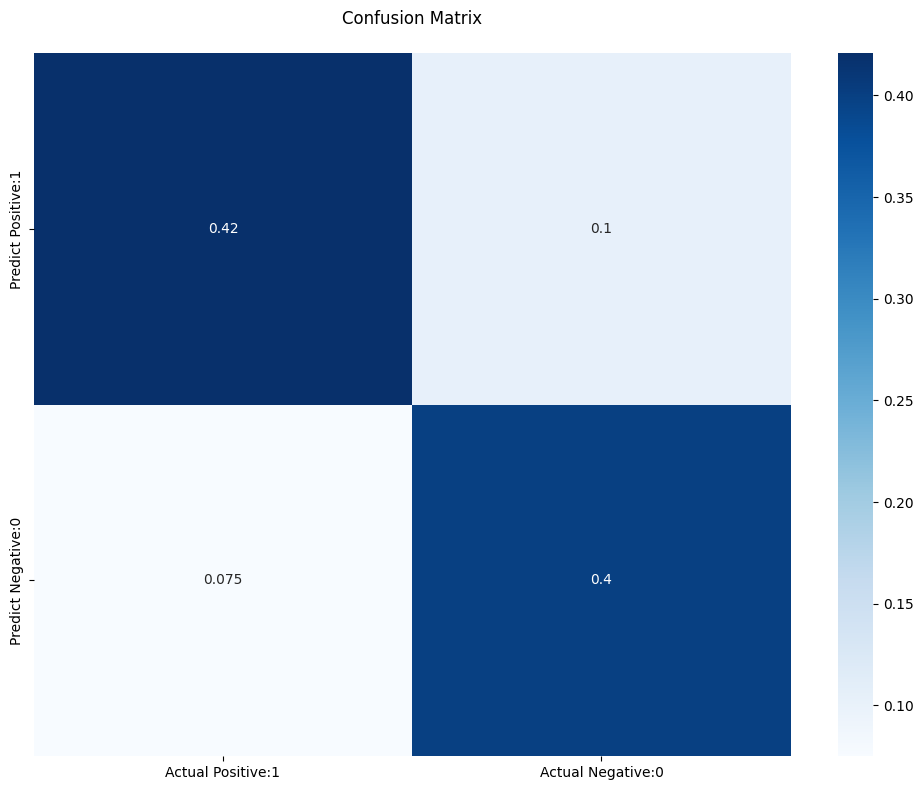

Max Score 0.8125
dt Confusion Matrix


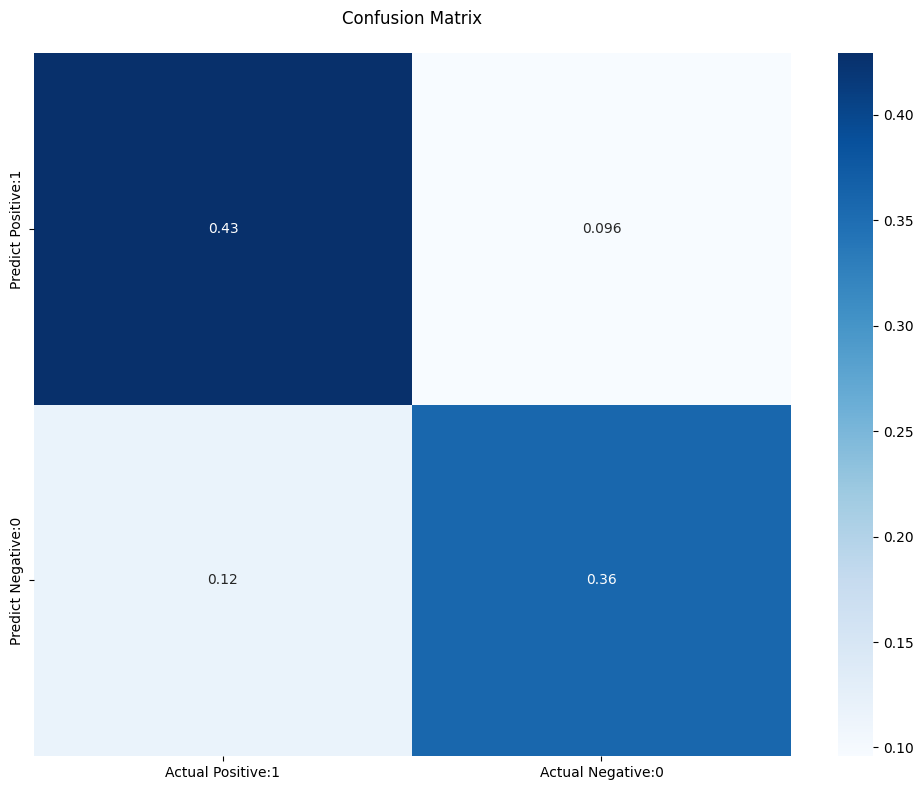

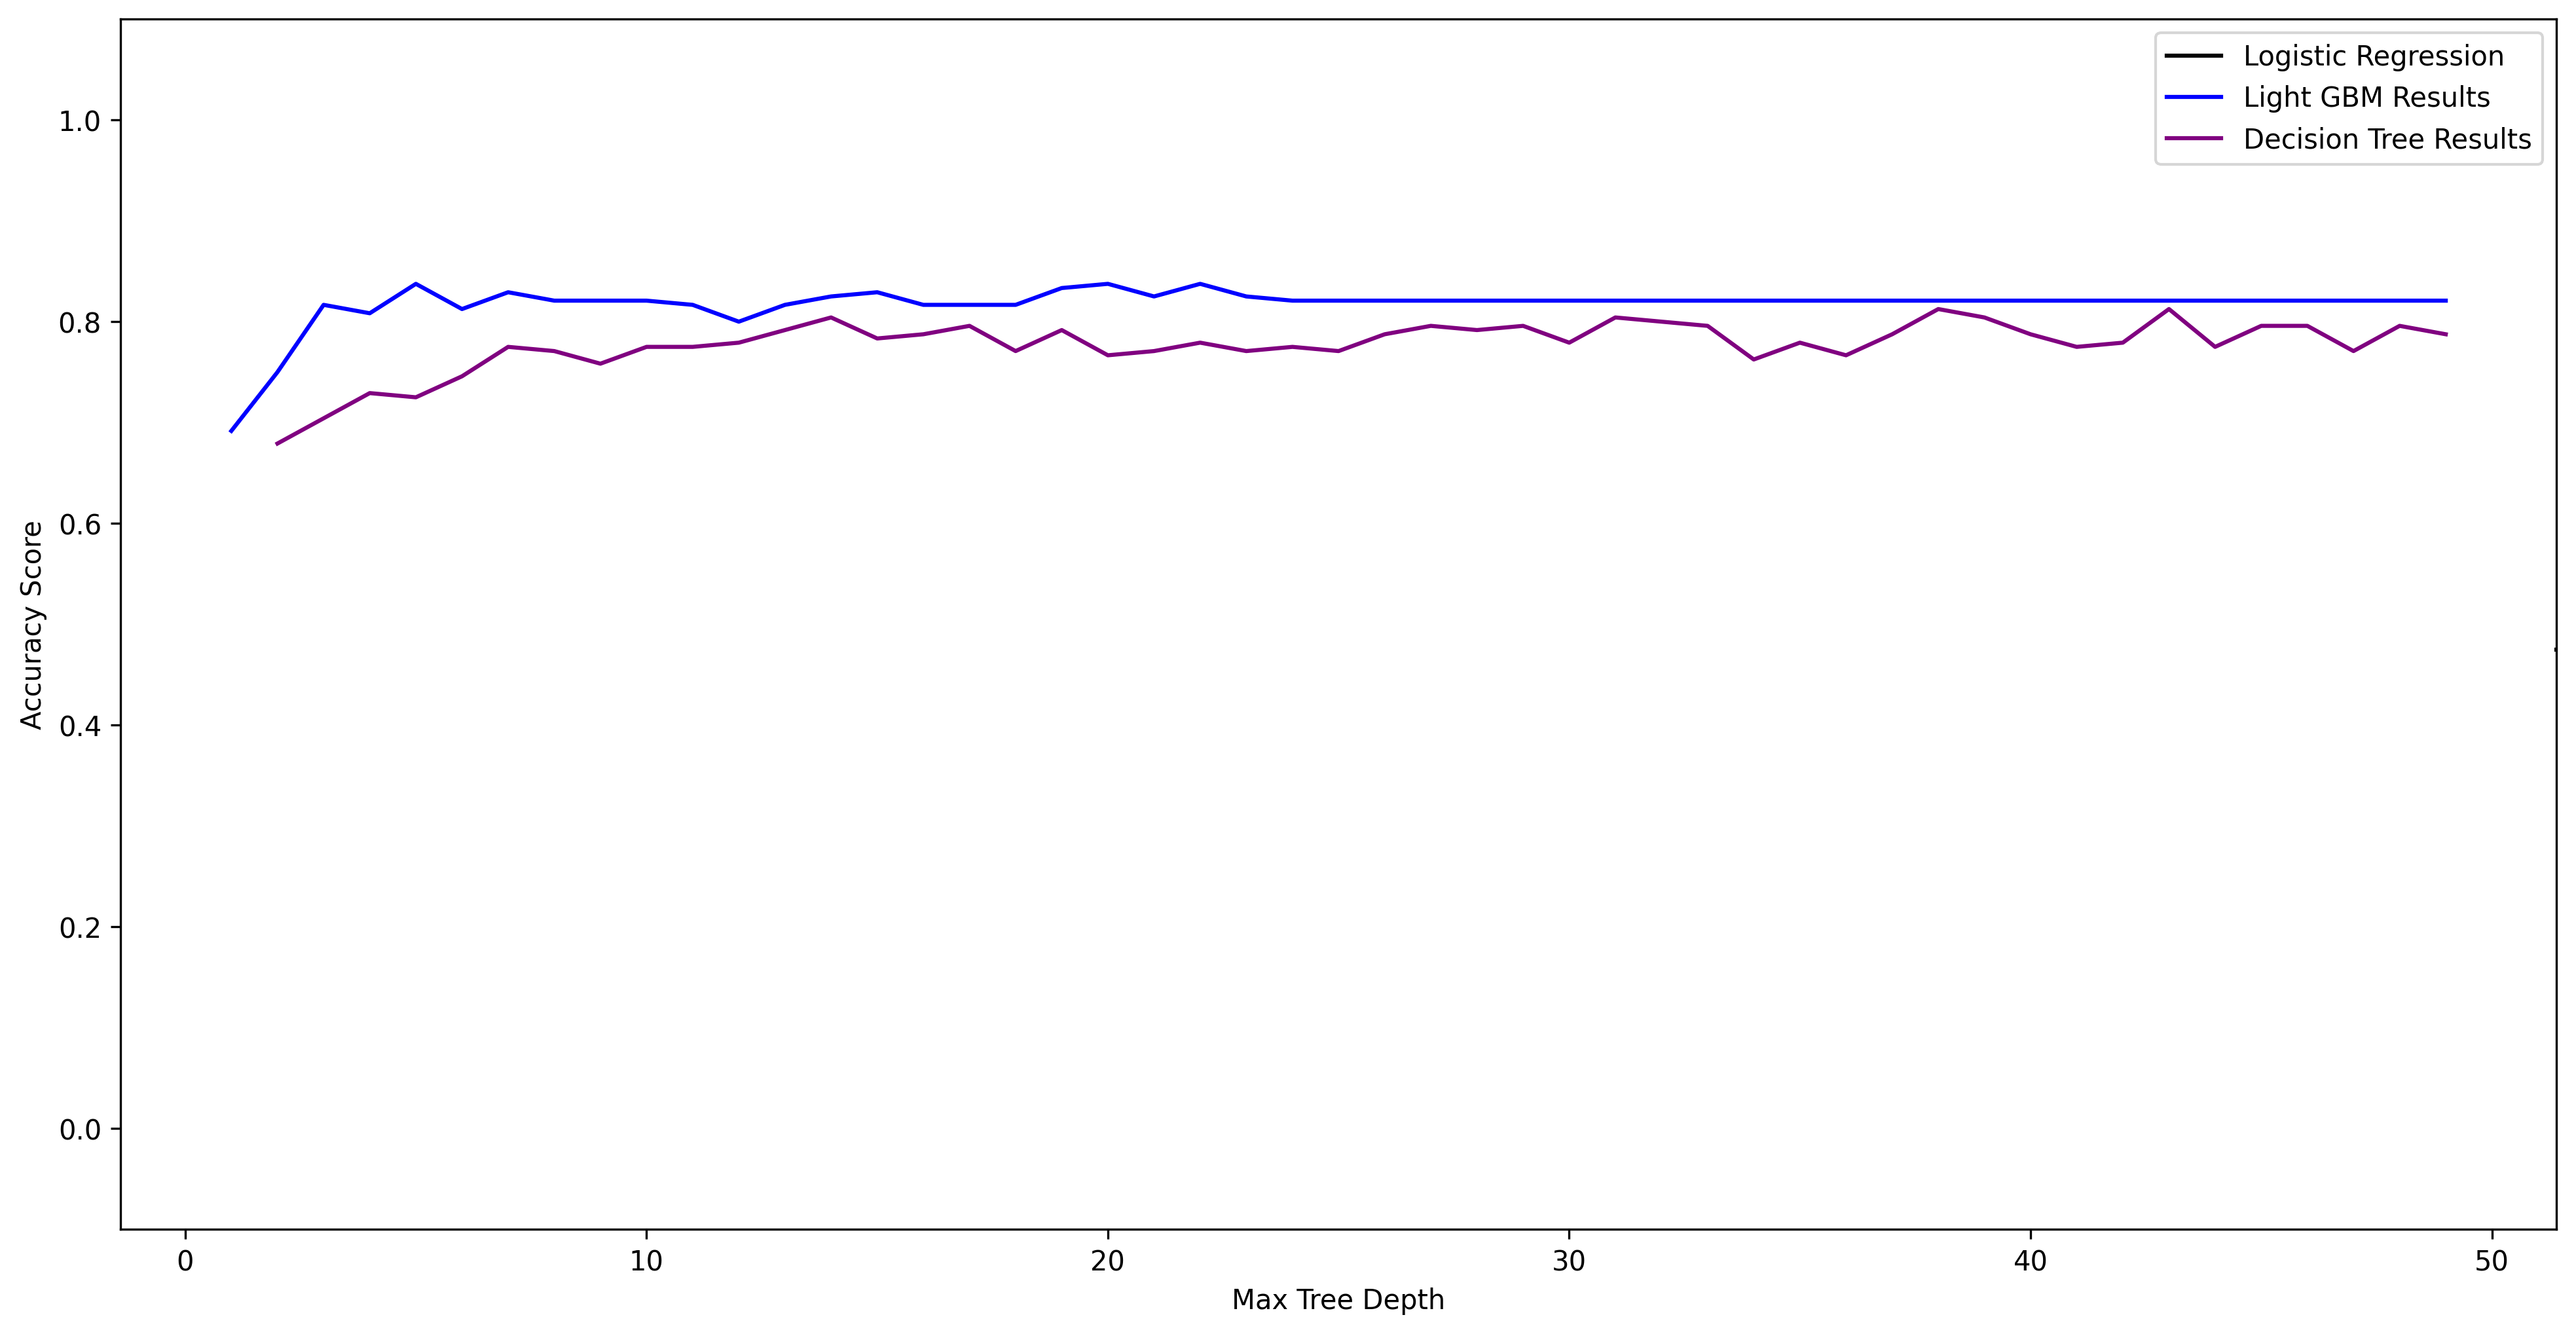

In [42]:
def plot_confusion_matrix(y_pred, y_test, norm=True):
    plt.figure(figsize=(10,8))
    cm = confusion_matrix(y_test, y_pred)
    if norm:
        cm = cm.astype('float32') / np.sum(np.sum(cm))

    cm_matrix = pd.DataFrame(
        data=cm, 
        columns=['Actual Positive:1', 'Actual Negative:0'], 
        index=['Predict Positive:1', 'Predict Negative:0']
    )
    sns.heatmap(cm_matrix, annot=True, cmap='Blues')
    plt.title("Confusion Matrix\n")
    plt.tight_layout()
    plt.show()
    return

X_nonull, y_nonull = filter_null(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train, X_test, y_train, y_test = train_test_evensplit(X_nonull, y_nonull, test_size=.2, proportion_false_true=1)
# model = LGBMClassifier()


logistic_model = LogisticRegression(n_jobs=-1, max_iter=100)
logistic_model.fit(X_train.copy(), y_train.copy()) # copy shouldn't be necessary?

y_pred = logistic_model.predict(X_test)    
logistic_score = logistic_model.score(X_test, y_test)
print('Logistic Score', logistic_score)


def model_ranged(model_name, range_min=0, range_max=15):
    scores = list()
    best_max_depth = None
    max_score = -np.inf
    best_model = None

    for max_depth in range(range_min, range_max):
        if model_name == 'lgbm':
            model = LGBMClassifier(max_depth=max_depth, n_jobs=-1)
        elif model_name == 'randfor':
            model = RandomForestRegressor(max_depth=max_depth)
        elif model_name == 'dt':
            model = DecisionTreeClassifier(max_depth=max_depth, max_features=X_train.shape[1])
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)    
        score = model.score(X_test, y_test)
        if score > max_score:
            best_max_depth = max_depth
            max_score = score
            best_model = model

#         plot_confusion_matrix(y_pred, y_test)
        scores.append((max_depth, score))

    print('Max Score', max_score)
    y_pred = model.predict(X_test) 
    print(model_name, 'Confusion Matrix')
    plot_confusion_matrix(y_pred, y_test)
    return scores, best_model,

lgbm_scores, lgbm_model = model_ranged('lgbm', range_min=1, range_max=50)
dtc_scores, dtc_model = model_ranged('dt', range_min=2, range_max=50)

plot_x_lgbm, plot_y_lgbm = zip(*lgbm_scores)
plot_x_dtc, plot_y_dtc = zip(*dtc_scores)

plt.figure(figsize=(16,8), dpi=300)
plt.axhline(logistic_score, xmin=plot_x_lgbm[0], xmax=plot_x_lgbm[-1], label='Logistic Regression', color='black')
sns.lineplot(x=plot_x_lgbm, y=plot_y_lgbm, label='Light GBM Results', color='blue')
sns.lineplot(x=plot_x_dtc, y=plot_y_dtc, label='Decision Tree Results', color='purple')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy Score')
plt.ylim([-.1, 1.1])
plt.legend()
plt.show()

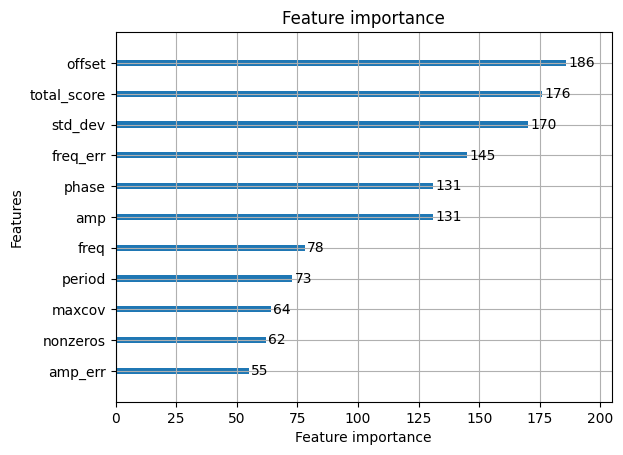

In [47]:
def print_decision_tree(model, save_path=''):
    text_repr = export_text(model)
    print(text_repr)
    if save_path:
        with open(save_path, 'w') as f:
            f.write(text_repr)
    return text_repr

def plot_decision_tree(model, save_path='', dpi=300):
    plt.figure(figsize=(16,16), dpi=dpi)
    plot_tree(
        model, 
        feature_names=model.feature_names_in_, 
        class_names=['No LSTID','LSTID'], 
        filled=True
    )
    if save_path:
        plt.savefig(save_path, dpi=dpi)
    plt.show()
    return

def plot_importance_custom(model, save_path='', dpi=300):
    plt.figure(figsize=(16,16), dpi=dpi)
    data = pd.DataFrame({
        'features' : model.feature_names_in_,
        'importance' : model.feature_importances_ if hasattr(model, 'feature_importances_') else model.coef_[0,:],
    }).set_index('features').sort_values('importance', ascending=False)
#     sns.barplot(data=data, x='features', y='importance', hue='importance', palette='flare')
    data.plot.bar()
    if save_path:
        plt.savefig(save_path, dpi=dpi)
    plt.show()
    return

# print_decision_tree(dtc_model, save_path='dt_text.txt')
# plot_decision_tree(dtc_model, save_path='dt_info.png')
def plot_best(best_model):
    if best_model is not None:
        try:
            plot_importance(best_model)
        except TypeError:
            plot_importance_custom(best_model, save_path='dt_fimp.png')
    else:
        print('No best model found')
    return
plot_best(lgbm_model)

# Decision Tree Information
[Decision Tree Function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
[Decision Tree Documentation](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)  
[Decision Tree Visualization Walkthrough](https://mljar.com/blog/visualize-decision-tree/)  
[TF Decision Forests](https://github.com/tensorflow/decision-forests)  
[Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/v3.3.2/index.html)  
[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
[Detailed Tree Visualization](https://github.com/parrt/dtreeviz)  

Corrections:
- DTs can handle multi-output, RF can with some libraries, gradient boosters cannot
- Confidence can easily be shown
    
Feature Sets:


Optimization Problem:
- Window-by-window:
    - Predict a single value for every window
    - Requires label for every window
    - More data available
    - More outliers by default
- Sequence-by-sequence:
    - Predict a single value for an entire set 
    - Requires feature summarization
    - Less data available
    - Better feature control
- Regression:
    - Determine value between 0 and 1
- Classification:
    - Determine class either 0 or 1